# Simple gradient method

In [83]:
import matplotlib.pyplot as plt
import autograd.numpy as np

In [84]:
def himmelblau(x):
    return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2

def ackley(x):
    return -20 * np.exp(-0.2 * np.sqrt(0.5 * (x[0]**2 + x[1]**2))) - np.exp(0.5 * (np.cos(2 * np.pi * x[0]) + np.cos(2 * np.pi * x[1]))) + 20 + np.e

## Algorithm

In [85]:
from autograd import grad

In [86]:
def simple_gradient(function, x, learning_rate, err=0.0001, max_iter=10000):
    algorith_path = [x]
    grad_f = grad(function)
    for _ in range(max_iter):
        gradient = grad_f(x)
        xnew = x - learning_rate * gradient
        if np.linalg.norm(xnew - x) < err:
            break
        x = xnew
        algorith_path.append(x)
    return x, np.array(algorith_path)

#### Checking whether the algorithm works near known minimums

In [87]:
# Himmelblau function
simple_gradient(himmelblau, np.array([3.1, 2.1]), 0.01)

(array([2.99987641, 2.00029827]),
 array([[3.1       , 2.1       ],
        [3.00176   , 2.04296   ],
        [2.99182455, 2.02755241],
        [2.99233369, 2.01964432],
        [2.99405506, 2.01441045],
        [2.99555879, 2.01065264],
        [2.99670728, 2.0078932 ],
        [2.99756114, 2.00585391],
        [2.99819286, 2.00434357],
        [2.99866019, 2.0032239 ],
        [2.99900619, 2.00239338],
        [2.99926256, 2.00177709],
        [2.99945264, 2.00131965],
        [2.99959364, 2.00098005],
        [2.99969827, 2.00072788],
        [2.99977594, 2.00054063],
        [2.9998336 , 2.00040156],
        [2.99987641, 2.00029827]]))

In [88]:
# Ackley function
simple_gradient(ackley, np.array([0.1, 0.1]), 0.0001)

(array([-0.00010027, -0.00010027]),
 array([[ 0.1       ,  0.1       ],
        [ 0.09938927,  0.09938927],
        [ 0.09877979,  0.09877979],
        ...,
        [-0.00010027, -0.00010027],
        [ 0.00010027,  0.00010027],
        [-0.00010027, -0.00010027]]))

## Testing on different parameters

#### Create function for displaying 3d plots

In [106]:
def plot3d_function(function, color='plasma', x=np.linspace(-6, 6, 100), y=np.linspace(-6, 6, 100)):
    X, Y = np.meshgrid(x, y)
    Z = function([X, Y])
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap=color)
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    plt.show()

#### Create function for displaying contour plots with colorbar

In [116]:
def plot_contour(function, starting_points, color='plasma', x=np.linspace(-6, 6, 100), y=np.linspace(-6, 6, 100)):
    X, Y = np.meshgrid(x, y)
    Z = function([X, Y])
    plt.figure(figsize=(10, 8))
    contour = plt.contourf(X, Y, Z, 100, cmap=color)
    plt.colorbar(contour)
    plt.xlabel('x')
    plt.ylabel('y')

    for starting_point in starting_points:
        plt.plot(starting_point[0], starting_point[1], 'ko', zorder=5)
        path = simple_gradient(function, starting_point, 0.001)[1]
        plt.plot(path[:, 0], path[:, 1], color='black', zorder=5)
        plt.plot(path[-1, 0], path[-1, 1], 'r.', zorder=5)
    plt.show()

### 1. Himmelblau's function

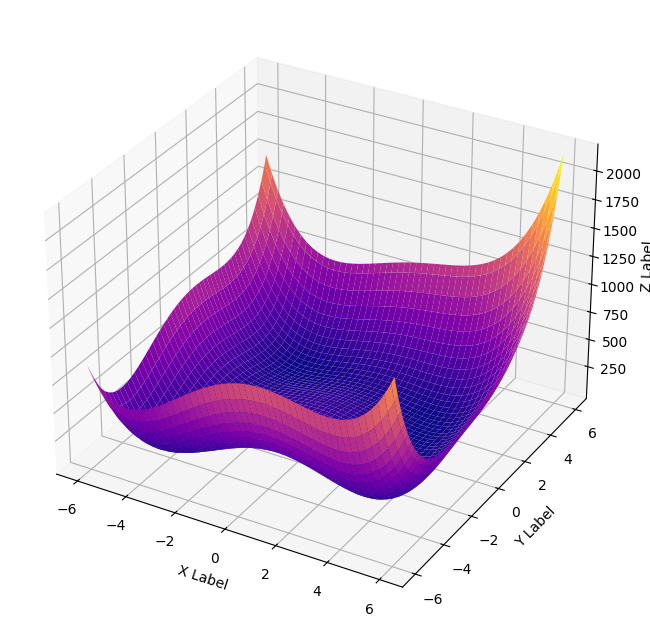

In [117]:
plot3d_function(himmelblau)

In [118]:
np.random.seed(0)

starting_points = np.random.uniform(-5, 5, (30, 2))
starting_points[:5]

array([[ 0.48813504,  2.15189366],
       [ 1.02763376,  0.44883183],
       [-0.76345201,  1.45894113],
       [-0.62412789,  3.91773001],
       [ 4.63662761, -1.16558481]])

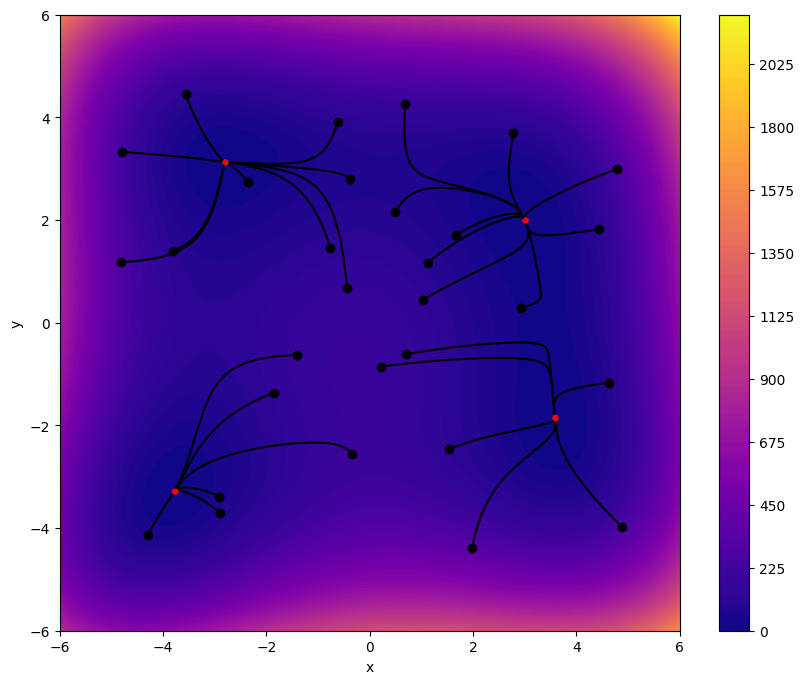

In [119]:
plot_contour(himmelblau, starting_points)

### 2. Ackley's function

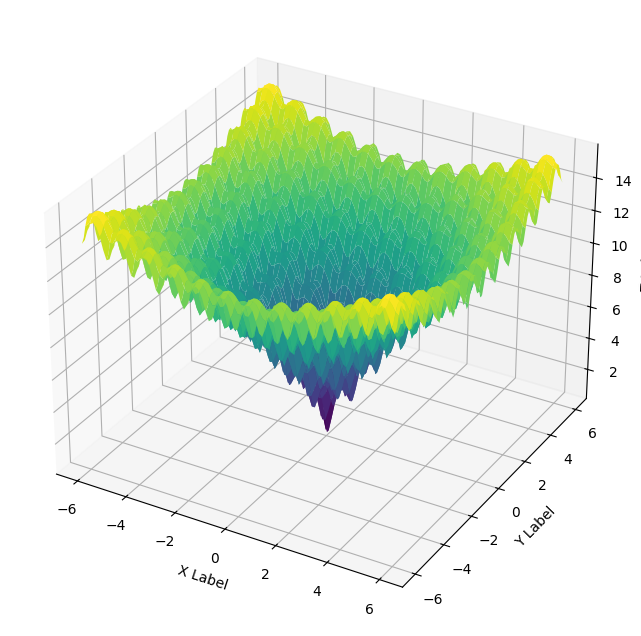

In [120]:
plot3d_function(ackley, color='viridis')

In [121]:
np.random.seed(0)

starting_points = np.random.uniform(-5, 5, (100, 2))
starting_points[:5]

array([[ 0.48813504,  2.15189366],
       [ 1.02763376,  0.44883183],
       [-0.76345201,  1.45894113],
       [-0.62412789,  3.91773001],
       [ 4.63662761, -1.16558481]])

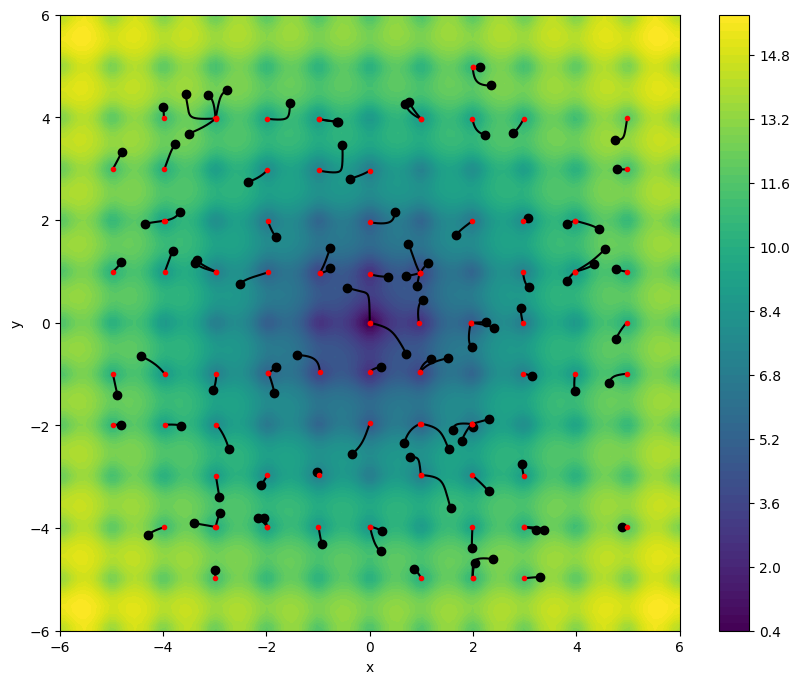

In [122]:
plot_contour(ackley, starting_points, color='viridis')